## 태양광 LSTM/ 충전시간발전량 예측하기

In [1]:
# Dataset : 믿음태양광발전소 데이터 + 기상청데이터

In [2]:
# 충전시간발전량 : y
# 다른 특성은 : X
# 여러가지 feature 바탕으로 충전시간발전량 예측
# LSTM 활용 on keras


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sun_weather=pd.read_csv('sun_weather.csv')

In [5]:
sun_weather.head()

,날짜,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
0,160701,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,...,24.100000,23.6,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
1,160702,0.0,7.3,24.4,30.1,31.4,57.0,1.1,1.8,5.9,...,20.299999,21.0,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2,160703,0.0,0.0,14.0,16.9,39.7,17.1,10.4,53.9,23.1,...,21.000000,21.4,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
3,160704,0.0,0.0,0.0,0.0,8.4,50.7,64.2,146.0,276.5,...,23.799999,23.6,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
4,160705,0.0,13.8,74.7,147.0,177.9,306.2,347.2,389.1,302.7,...,25.900000,25.6,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000


In [6]:
sun_weather.shape

(382, 84)

In [7]:
#날짜 컬럼 date데이터로 변환
sun_weather['날짜'] = pd.to_datetime(sun_weather['날짜'], format='%y%m%d')

In [8]:
sun_weather.index = sun_weather['날짜']

In [9]:
del sun_weather['날짜']

In [10]:
sun_weather

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,1.3,...,24.100000,23.600000,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
2016-07-02,0.0,7.3,24.4,30.1,31.4,57.0,1.1,1.8,5.9,27.3,...,20.299999,21.000000,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2016-07-03,0.0,0.0,14.0,16.9,39.7,17.1,10.4,53.9,23.1,3.3,...,21.000000,21.400000,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
2016-07-04,0.0,0.0,0.0,0.0,8.4,50.7,64.2,146.0,276.5,181.0,...,23.799999,23.600000,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
2016-07-05,0.0,13.8,74.7,147.0,177.9,306.2,347.2,389.1,302.7,292.2,...,25.900000,25.600000,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000
2016-07-06,0.0,18.8,66.1,210.4,226.4,360.6,373.4,380.5,411.6,309.9,...,25.799999,24.700001,24.500000,24.000000,22.500000,22.600000,22.900000,22.900000,22.400000,22.200001
2016-07-07,0.0,11.5,49.9,139.7,186.4,210.7,299.6,369.8,361.0,356.6,...,23.600000,23.700001,23.400000,23.100000,23.000000,23.299999,23.200001,23.200001,23.400000,23.700001
2016-07-08,0.0,14.9,85.7,196.1,286.8,360.0,316.1,213.3,368.9,374.2,...,23.600000,23.500000,22.700001,22.799999,22.299999,22.200001,21.700001,21.799999,21.400000,21.500000
2016-07-09,0.0,14.2,79.2,180.4,265.5,215.5,318.0,374.0,385.7,356.4,...,26.100000,25.100000,24.799999,23.100000,22.299999,22.000000,21.500000,21.700001,21.500000,21.100000


In [11]:
sun_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 382 entries, 2016-07-01 to 2017-07-17
Data columns (total 83 columns):
5Hr        382 non-null float64
6Hr        382 non-null float64
7Hr        382 non-null float64
8Hr        382 non-null float64
9Hr        382 non-null float64
10Hr       382 non-null float64
11Hr       382 non-null float64
12Hr       382 non-null float64
13Hr       382 non-null float64
14Hr       382 non-null float64
15Hr       382 non-null float64
16Hr       382 non-null float64
17Hr       382 non-null float64
18Hr       382 non-null float64
19Hr       382 non-null float64
20Hr       382 non-null int64
충전시간발전량    382 non-null float64
일출시간       382 non-null int64
일몰시간       382 non-null int64
강수량5hr     382 non-null float64
강수량6hr     382 non-null float64
강수량7hr     382 non-null float64
강수량8hr     382 non-null float64
강수량9hr     382 non-null float64
강수량10hr    382 non-null float64
강수량11hr    382 non-null float64
강수량12hr    382 non-null float64
강수량13hr    382 non

In [12]:
sun_weather.head()

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,1.3,...,24.100000,23.6,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
2016-07-02,0.0,7.3,24.4,30.1,31.4,57.0,1.1,1.8,5.9,27.3,...,20.299999,21.0,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2016-07-03,0.0,0.0,14.0,16.9,39.7,17.1,10.4,53.9,23.1,3.3,...,21.000000,21.4,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
2016-07-04,0.0,0.0,0.0,0.0,8.4,50.7,64.2,146.0,276.5,181.0,...,23.799999,23.6,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
2016-07-05,0.0,13.8,74.7,147.0,177.9,306.2,347.2,389.1,302.7,292.2,...,25.900000,25.6,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000


In [13]:
# from pandas.tseries.offsets import MonthEnd
# sun_weather['날짜'] = pd.to_datetime(sun_weather['날짜'])

In [14]:
# from datetime import datetime, timedelta
# s = sun_weather.날짜
# s

In [15]:
# sun_weather.plot()

In [16]:
# sun_weather.dtypes

In [17]:
sun_weather.shape

(382, 83)

In [18]:
sun_weather.loc['2017-03-25']

5Hr           0.0
6Hr           0.0
7Hr           0.0
8Hr           1.2
9Hr          13.9
10Hr         21.7
11Hr         24.5
12Hr         26.1
13Hr         14.6
14Hr         36.9
15Hr         19.3
16Hr         66.6
17Hr         54.5
18Hr          4.3
19Hr          0.0
20Hr          0.0
충전시간발전량     209.7
일출시간        630.0
일몰시간       1848.0
강수량5hr        0.6
강수량6hr        0.5
강수량7hr        0.4
강수량8hr        0.0
강수량9hr        0.0
강수량10hr       0.0
강수량11hr       0.0
강수량12hr       0.0
강수량13hr       0.0
강수량14hr       0.0
강수량15hr       0.0
            ...  
풍속7hr         2.4
풍속8hr         2.0
풍속9hr         2.8
풍속10hr        2.9
풍속11hr        0.3
풍속12hr        0.5
풍속13hr        0.4
풍속14hr        0.2
풍속15hr        0.7
풍속16hr        1.1
풍속17hr        0.4
풍속18hr        0.7
풍속19hr        0.5
풍속20hr        0.3
기온5hr         7.8
기온6hr         7.8
기온7hr         7.6
기온8hr         8.7
기온9hr         8.0
기온10hr        7.5
기온11hr        6.5
기온12hr        5.5
기온13hr        6.0
기온14hr        5.3
기온15hr    

In [19]:
# 382 * 0.7

In [20]:
train = sun_weather.loc[:'2017-03-25']
test = sun_weather.loc['2017-03-25':]

In [21]:
train.shape

(268, 83)

In [22]:
test.shape

(115, 83)

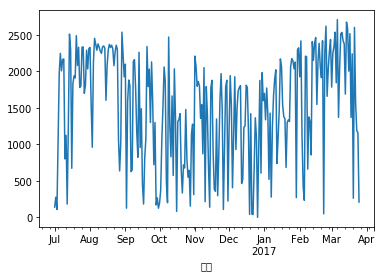

In [23]:
ax = train.충전시간발전량.plot()

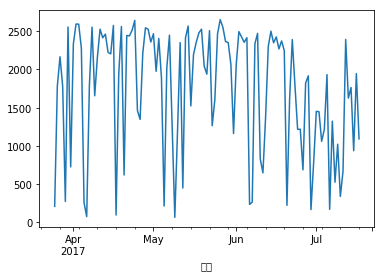

In [24]:
test.충전시간발전량.plot()

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [26]:
train.head()

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,1.3,...,24.100000,23.6,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
2016-07-02,0.0,7.3,24.4,30.1,31.4,57.0,1.1,1.8,5.9,27.3,...,20.299999,21.0,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2016-07-03,0.0,0.0,14.0,16.9,39.7,17.1,10.4,53.9,23.1,3.3,...,21.000000,21.4,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
2016-07-04,0.0,0.0,0.0,0.0,8.4,50.7,64.2,146.0,276.5,181.0,...,23.799999,23.6,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
2016-07-05,0.0,13.8,74.7,147.0,177.9,306.2,347.2,389.1,302.7,292.2,...,25.900000,25.6,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000


In [27]:
test.head()

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2017-03-25,0.0,0.0,0.0,1.2,13.9,21.7,24.5,26.1,14.6,36.9,...,6.5,5.5,6.0,5.3,4.7,5.2,4.7,4.4,4.2,3.5
2017-03-26,0.0,0.2,43.6,122.7,206.9,349.4,375.5,340.8,301.4,250.6,...,7.6,6.7,6.3,6.6,6.3,6.0,5.6,5.3,6.1,6.4
2017-03-27,0.0,0.0,29.4,99.4,108.0,242.1,293.6,419.4,351.7,373.9,...,8.8,6.8,6.7,5.5,6.3,5.5,5.7,4.7,3.4,2.7
2017-03-28,0.0,0.2,47.6,163.2,279.8,366.3,376.1,319.0,293.3,245.1,...,9.6,9.3,8.7,8.9,8.1,7.5,7.4,7.4,7.4,7.3
2017-03-29,0.0,0.0,0.0,2.2,5.7,22.8,34.7,38.7,55.1,56.4,...,10.5,10.1,8.9,8.4,9.4,8.8,8.3,7.9,7.1,6.5


In [28]:
train_sc = sc.fit_transform(train)
# train_sc

In [29]:
test_sc = sc.transform(test)
# test_sc

In [30]:
test_sc.max()

1.8563829787234043

In [31]:
test_sc.min()

-0.18965517241379315

In [32]:
train_sc.max()

1.0000000000000002

In [33]:
train_sc.min()

0.0

In [34]:
train_sc_df = pd.DataFrame(train_sc, columns= train.columns, index=train.index)
train_sc_df.head(2)

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.0,0.132979,0.414141,0.211027,0.089433,0.156135,0.076749,0.019991,0.060490,0.003129,...,0.842444,0.837209,0.869565,0.886598,0.910653,0.920690,0.909091,0.871287,0.870130,0.850794
2016-07-02,0.0,0.388298,0.273850,0.143061,0.096172,0.150079,0.002490,0.003911,0.012567,0.065704,...,0.720257,0.750831,0.759197,0.756014,0.762887,0.786207,0.764310,0.801980,0.795455,0.780952


In [35]:
test_sc_df = pd.DataFrame(test_sc, columns= test.columns, index=test.index)
test_sc_df.head(2)

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2017-03-25,0.0,0.000000,0.000000,0.005703,0.042573,0.057135,0.055468,0.056714,0.031097,0.088809,...,0.276527,0.235880,0.257525,0.237113,0.223368,0.255172,0.252525,0.264026,0.279221,0.257143
2017-03-26,0.0,0.010638,0.489338,0.583175,0.633691,0.919958,0.850125,0.740548,0.641960,0.603129,...,0.311897,0.275748,0.267559,0.281787,0.278351,0.282759,0.282828,0.293729,0.340909,0.349206


In [36]:
# test_sc_df.isnull().sum()

In [37]:
# test_sc_df.충전시간발전량

In [38]:
X_train = train_sc_df.dropna().drop('충전시간발전량', axis=1)
y_train = train_sc_df.dropna()[['충전시간발전량']]

In [39]:
X_train.head(1)

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.0,0.132979,0.414141,0.211027,0.089433,0.156135,0.076749,0.019991,0.06049,0.003129,...,0.842444,0.837209,0.869565,0.886598,0.910653,0.92069,0.909091,0.871287,0.87013,0.850794


In [40]:
y_train.head(1)

,충전시간발전량
날짜,
2016-07-01,0.051589


In [41]:
X_test = test_sc_df.dropna().drop('충전시간발전량', axis=1)
# y_test = test_sc_df.dropna().충전시간발전량
y_test = test_sc_df.dropna()[['충전시간발전량']]

In [42]:
X_test.head(1)

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2017-03-25,0.0,0.0,0.0,0.005703,0.042573,0.057135,0.055468,0.056714,0.031097,0.088809,...,0.276527,0.23588,0.257525,0.237113,0.223368,0.255172,0.252525,0.264026,0.279221,0.257143


In [43]:
y_test.head(1)

,충전시간발전량
날짜,
2017-03-25,0.077162


In [44]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [45]:
X_train_t = X_train.reshape(X_train.shape[0], 82, 1)
X_test_t = X_test.reshape(X_test.shape[0], 82, 1)

In [46]:
X_train_t.shape

(268, 82, 1)

In [47]:
X_test_t.shape

(115, 82, 1)

In [48]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [49]:
K.clear_session()
model = Sequential()
model.add(LSTM(20, input_shape=(82,1))) # shape는 차원맞추는 것
model.add(Dense(1))  #Dense : output 개수

In [50]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_t, y_train, epochs = 200, batch_size=30, verbose=1)

Epoch 1/200
268/268 [==============================] - 1s 3ms/step - loss: 0.3771
Epoch 2/200
268/268 [==============================] - 0s 1ms/step - loss: 0.2164
Epoch 3/200
268/268 [==============================] - 0s 1ms/step - loss: 0.1315
Epoch 4/200
268/268 [==============================] - 0s 1ms/step - loss: 0.1086
Epoch 5/200
268/268 [==============================] - 0s 1ms/step - loss: 0.1066
Epoch 6/200
268/268 [==============================] - 0s 1ms/step - loss: 0.1011
Epoch 7/200
268/268 [==============================] - 0s 1ms/step - loss: 0.0954
Epoch 8/200
268/268 [==============================] - 0s 1ms/step - loss: 0.0922
Epoch 9/200
268/268 [==============================] - 0s 1ms/step - loss: 0.0888
Epoch 10/200
268/268 [==============================] - 0s 1ms/step - loss: 0.0856
Epoch 11/200
268/268 [==============================] - 0s 1ms/step - loss: 0.0832
Epoch 12/200
268/268 [==============================] - 0s 997us/step - loss: 0.0809
Epoch 13/20

268/268 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 197/200
268/268 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 198/200
268/268 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 199/200
268/268 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 200/200
268/268 [==============================] - 0s 1ms/step - loss: 0.0031


In [64]:
y_pred = model.predict(X_test_t)

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [65]:
rmse = mean_squared_error(y_test, y_pred)

In [66]:
rmse

0.011511881195530068

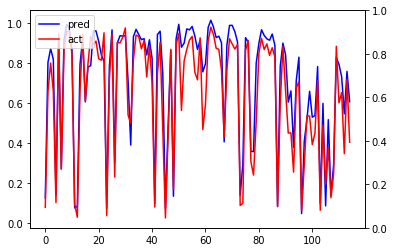

In [67]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

pred = y_pred

loss_ax.plot(pred, 'b', label='pred')

loss_ax.plot(y_test, 'r', label='act')

loss_ax.legend(loc='upper left')

plt.show()